# Comprehensive Tabular Model Comparison
## XGBoost vs TabPFNv2 vs TabICL vs FT-Transformer

This notebook provides a comprehensive comparison of tabular machine learning models with:
- **Enhanced Evaluation Metrics**: ROC curves, calibration plots, statistical significance
- **Explainability Analysis**: SHAP, LIME, feature importance
- **Ablation Studies**: Feature importance, hyperparameter sensitivity
- **Class Imbalance Analysis**: Performance on minority class
- **Computational Efficiency**: Training time, inference speed, memory usage

In [44]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import xgboost as xgb
from tabpfn import TabPFNClassifier
from tabicl import TabICLClassifier
from rtdl import FTTransformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# UCI ML Repository
from ucimlrepo import fetch_ucirepo

# Our custom analysis frameworks
from enhanced_evaluation import ComprehensiveEvaluator
from explainability_analysis import ExplainabilityAnalyzer
from ablation_studies import AblationStudyAnalyzer
from enhanced_ablation_studies import run_enhanced_ablation_studies

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and Preprocessing

In [23]:
# Load the Online Shoppers Purchasing Intention Dataset
print("Loading Online Shoppers Dataset...")
online_original = fetch_ucirepo(id=468)
online_shoppers = online_original.data.original

print(f"Dataset shape: {online_shoppers.shape}")
print(f"\nDataset info:")
print(online_shoppers.info())

# Display class distribution
print(f"\nClass distribution:")
print(online_shoppers['Revenue'].value_counts())
print(f"Class imbalance ratio: {online_shoppers['Revenue'].value_counts()[False] / online_shoppers['Revenue'].value_counts()[True]:.2f}:1")

Loading Online Shoppers Dataset...
Dataset shape: (12330, 18)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13 

In [3]:
# Preprocessing
df = online_shoppers.copy()

# Encode categorical features
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Define feature names
feature_names = [
    'Administrative', 'Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
    'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
    'VisitorType', 'Weekend'
]

# Separate features and target
X = df.drop(columns=['Revenue']).values
y = df['Revenue'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {feature_names}")

Features shape: (12330, 17)
Target shape: (12330,)
Feature names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [24]:
# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape}")
print(f"Validation set: {X_val_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

# Check class distribution in splits
print(f"\nClass distribution in train: {np.bincount(y_train)}")
print(f"Class distribution in val: {np.bincount(y_val)}")
print(f"Class distribution in test: {np.bincount(y_test)}")

Training set: (7891, 17)
Validation set: (1973, 17)
Test set: (2466, 17)

Class distribution in train: [6670 1221]
Class distribution in val: [1668  305]
Class distribution in test: [2084  382]


## 2. Model Training and Evaluation

In [25]:
# Initialize comprehensive evaluator
evaluator = ComprehensiveEvaluator()

# Store all models for later analysis
models = {}

### 2.1 XGBoost

Training XGBoost...

Evaluating XGBoost

📊 Performance Metrics:
   Accuracy: 0.8974
   Balanced Accuracy: 0.7618
   Precision: 0.7129
   Recall: 0.5654
   F1-Score: 0.6307
   Matthews Correlation: 0.5772
   AUC-ROC: 0.9212
   Average Precision: 0.7178
   Log Loss: 0.2476
   Brier Score: 0.0758

⏱️  Timing:
   Training Time: 0.1749s
   Inference Time: 0.0032s
   Predictions/sec: 777564

🔄 Cross-Validation:
   F1 Score: 0.6338 ± 0.0207


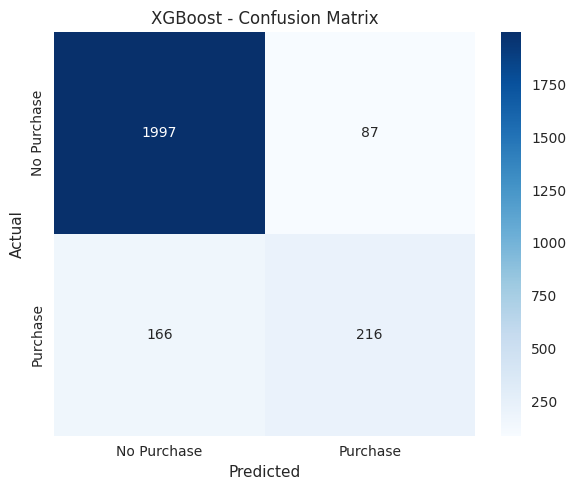

<Figure size 800x550 with 0 Axes>

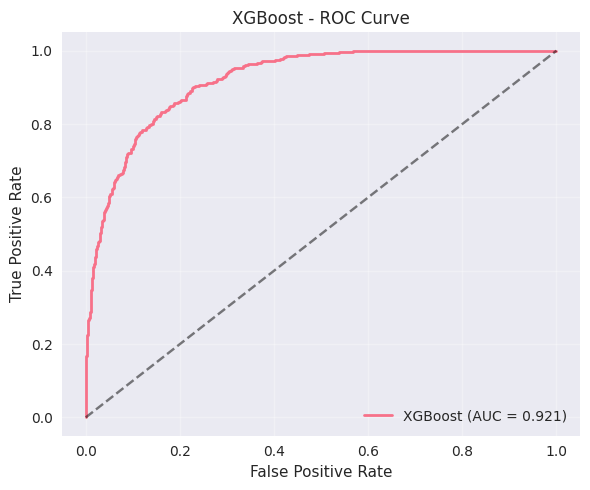

<Figure size 800x550 with 0 Axes>

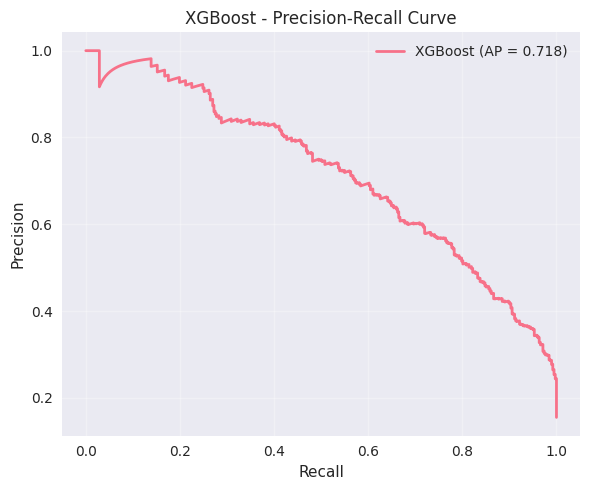

<Figure size 800x550 with 0 Axes>

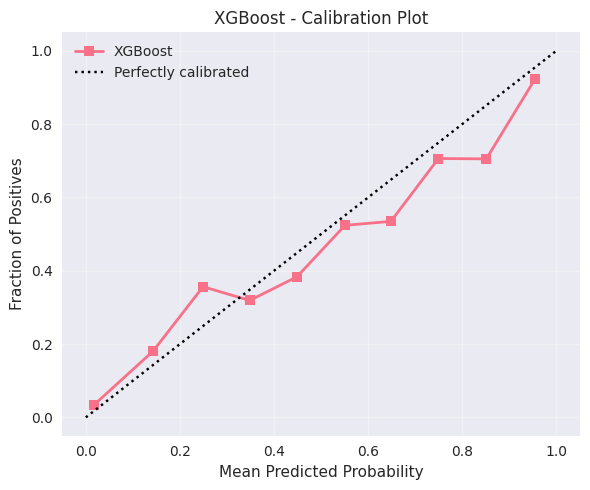

<Figure size 800x550 with 0 Axes>

In [26]:
print("Training XGBoost...")

# XGBoost with optimized parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Evaluate with comprehensive metrics
xgb_results = evaluator.evaluate_model(
    xgb_model, "XGBoost", 
    X_train_scaled, X_test_scaled, y_train, y_test,
    X_val_scaled, y_val
)

models['XGBoost'] = xgb_model

### 2.2 TabPFN v2

Training TabPFN v2...

Evaluating TabPFN v2

📊 Performance Metrics:
   Accuracy: 0.9011
   Balanced Accuracy: 0.7747
   Precision: 0.7197
   Recall: 0.5916
   F1-Score: 0.6494
   Matthews Correlation: 0.5963
   AUC-ROC: 0.9326
   Average Precision: 0.7533
   Log Loss: 0.2254
   Brier Score: 0.0702

⏱️  Timing:
   Training Time: 0.4366s
   Inference Time: 6.9796s
   Predictions/sec: 353

🔄 Cross-Validation:
   F1 Score: 0.6676 ± 0.0199


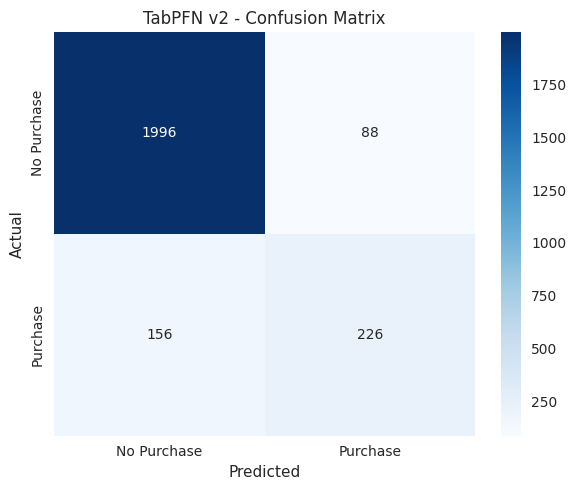

<Figure size 800x550 with 0 Axes>

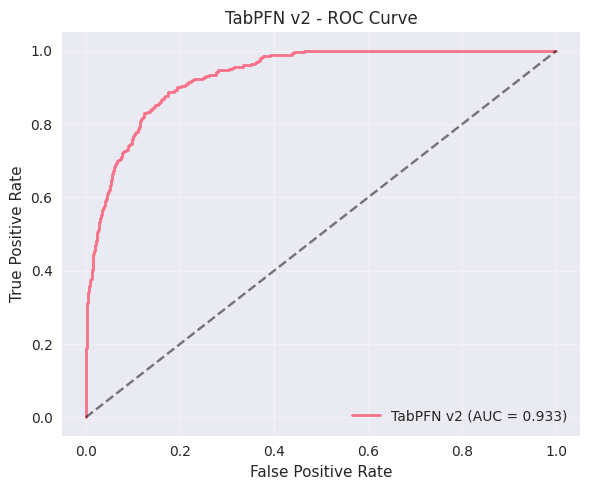

<Figure size 800x550 with 0 Axes>

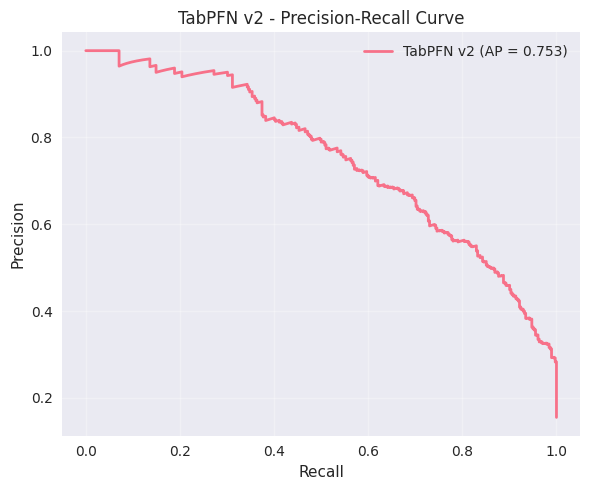

<Figure size 800x550 with 0 Axes>

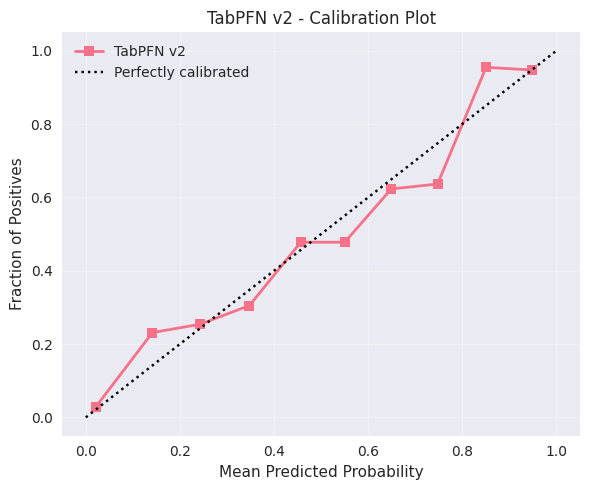

<Figure size 800x550 with 0 Axes>

In [27]:
print("Training TabPFN v2...")

# TabPFN v2
tabpfn_model = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')

# Evaluate with comprehensive metrics
tabpfn_results = evaluator.evaluate_model(
    tabpfn_model, "TabPFN v2", 
    X_train_scaled, X_test_scaled, y_train, y_test,
    X_val_scaled, y_val
)

models['TabPFN v2'] = tabpfn_model

### 2.3 TabICL

Training TabICL...

Evaluating TabICL

📊 Performance Metrics:
   Accuracy: 0.8994
   Balanced Accuracy: 0.7705
   Precision: 0.7147
   Recall: 0.5838
   F1-Score: 0.6427
   Matthews Correlation: 0.5889
   AUC-ROC: 0.9340
   Average Precision: 0.7543
   Log Loss: 0.2227
   Brier Score: 0.0697

⏱️  Timing:
   Training Time: 0.5477s
   Inference Time: 11.5047s
   Predictions/sec: 214

🔄 Cross-Validation:
   F1 Score: 0.6665 ± 0.0245


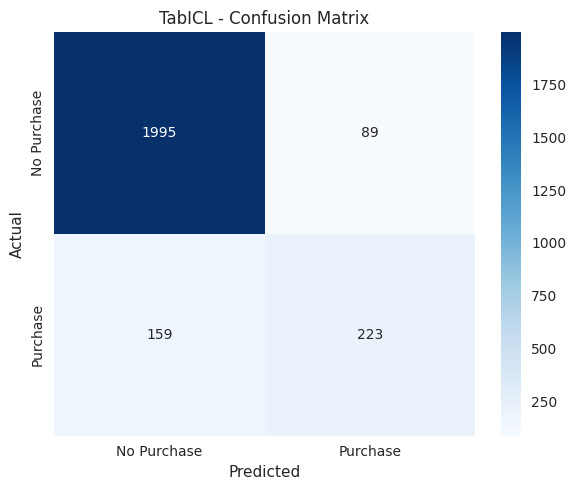

<Figure size 800x550 with 0 Axes>

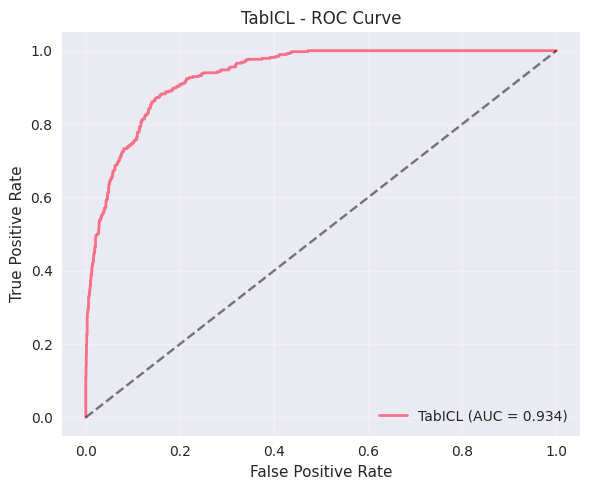

<Figure size 800x550 with 0 Axes>

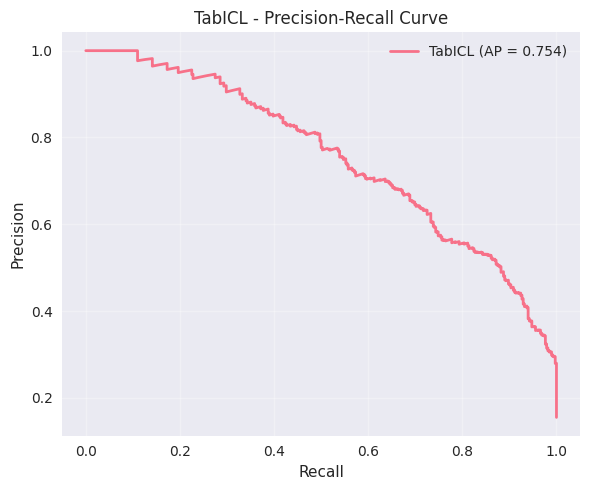

<Figure size 800x550 with 0 Axes>

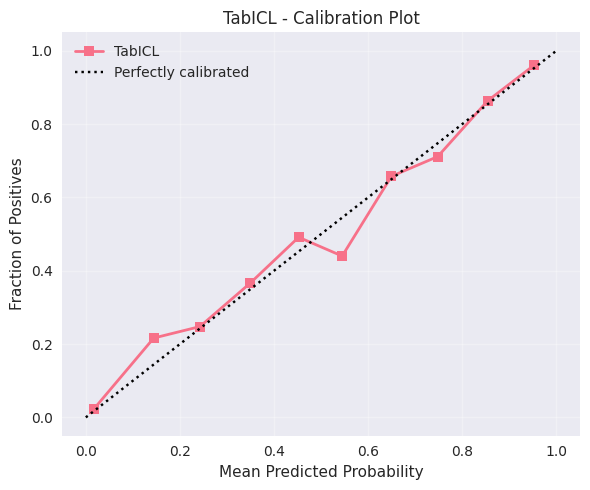

<Figure size 800x550 with 0 Axes>

In [28]:
print("Training TabICL...")

# from sklearn.base import BaseEstimator
# import numpy as np

# # Monkey patch for compatibility
# def _validate_data_fallback(self, X, y=None, reset=True, validate_separately=False, **check_params):
#     from sklearn.utils.validation import check_X_y, check_array
#     if y is not None:
#         return check_X_y(X, y, **check_params)
#     else:
#         return check_array(X, **check_params)

# # Apply the patch if needed
# if not hasattr(BaseEstimator, '_validate_data'):
#     BaseEstimator._validate_data = _validate_data_fallback


# TabICL
tabicl_model = TabICLClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')

# Evaluate with comprehensive metrics
tabicl_results = evaluator.evaluate_model(
    tabicl_model, "TabICL", 
    X_train_scaled, X_test_scaled, y_train, y_test,
    X_val_scaled, y_val
)

models['TabICL'] = tabicl_model

In [29]:
print("Training FT-Transformer...")

# Note: This is a simplified version. For full implementation, see the individual FT-Transformer notebook
print("FT-Transformer training would be implemented here with proper categorical/numerical feature separation")
print("For now, we'll skip this model to avoid complexity in the comprehensive comparison")

Training FT-Transformer...
FT-Transformer training would be implemented here with proper categorical/numerical feature separation
For now, we'll skip this model to avoid complexity in the comprehensive comparison


### 2.4 FT-Transformer

## 3. Comprehensive Model Comparison


MODEL COMPARISON SUMMARY
           accuracy        f1 precision    recall       mcc   auc_roc
XGBoost    0.897405  0.630657  0.712871  0.565445  0.577181   0.92125
TabPFN v2  0.901054  0.649425  0.719745  0.591623  0.596322  0.932553
TabICL     0.899432  0.642651  0.714744   0.58377  0.588882   0.93395

TIMING COMPARISON
          train_time inference_time predictions_per_second
XGBoost      0.17488       0.003171          777563.799729
TabPFN v2   0.436562       6.979644             353.313146
TabICL      0.547702      11.504734             214.346555


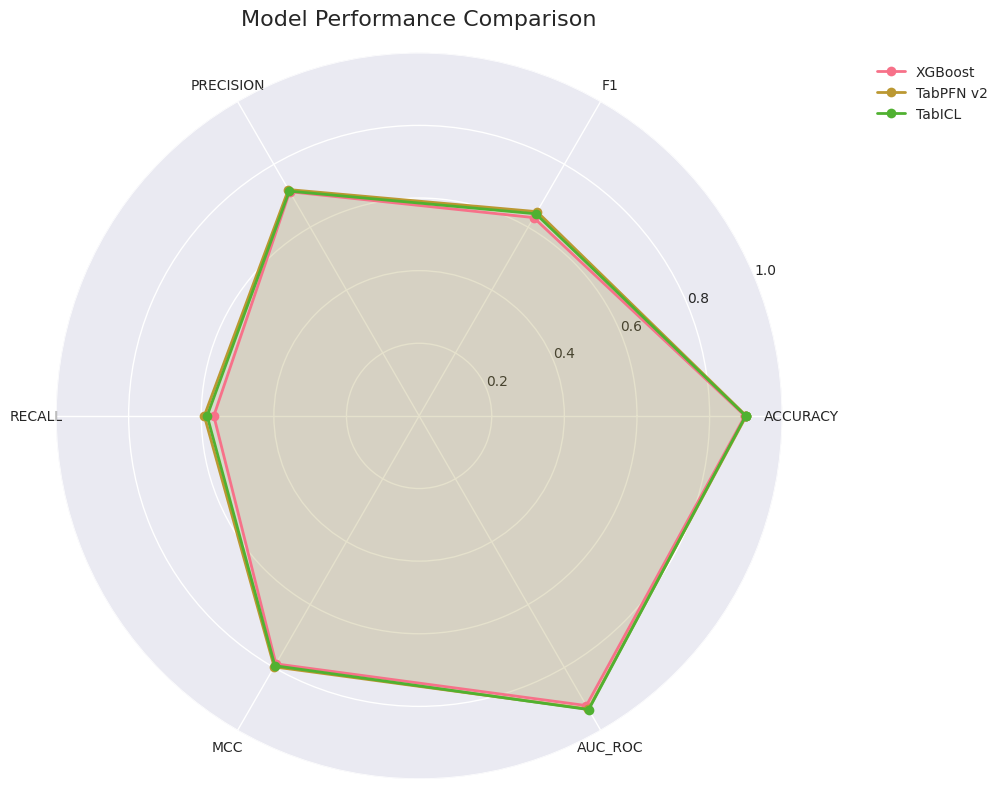

<Figure size 800x550 with 0 Axes>

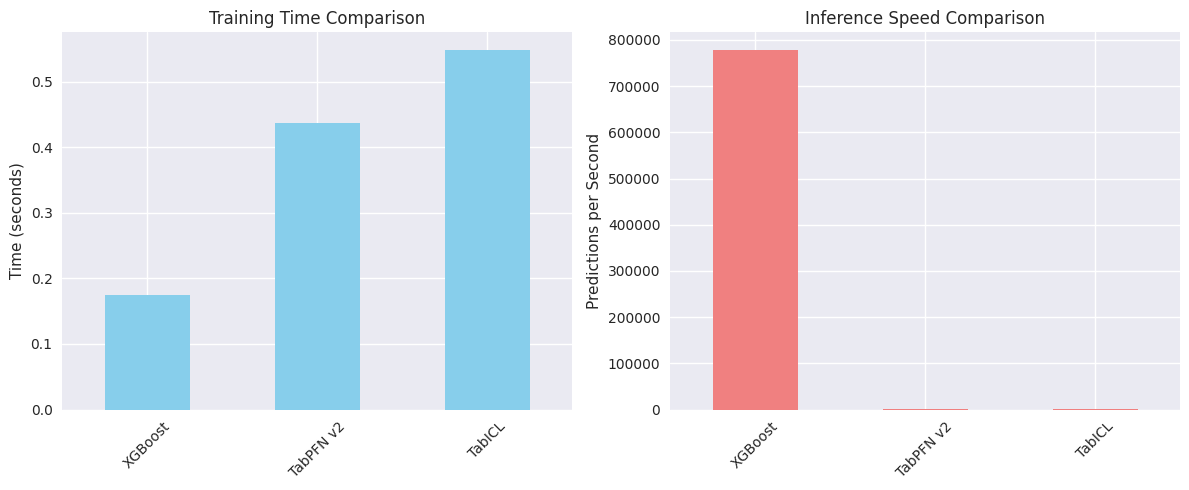


DETAILED PERFORMANCE COMPARISON
          model_name  accuracy balanced_accuracy precision    recall        f1       mcc train_time inference_time predictions_per_second   auc_roc avg_precision  log_loss brier_score cv_f1_mean cv_f1_std
XGBoost      XGBoost  0.897405          0.761849  0.712871  0.565445  0.630657  0.577181    0.17488       0.003171          777563.799729   0.92125      0.717805  0.247605     0.07583   0.633772  0.020686
TabPFN v2  TabPFN v2  0.901054          0.774698  0.719745  0.591623  0.649425  0.596322   0.436562       6.979644             353.313146  0.932553      0.753285  0.225356    0.070177   0.667581  0.019888
TabICL        TabICL  0.899432          0.770532  0.714744   0.58377  0.642651  0.588882   0.547702      11.504734             214.346555   0.93395      0.754274  0.222694    0.069713   0.666521  0.024492


<Figure size 800x550 with 0 Axes>

In [30]:
# Generate comprehensive comparison
comparison_df = evaluator.compare_models()

# Display detailed comparison table
print("\n" + "="*100)
print("DETAILED PERFORMANCE COMPARISON")
print("="*100)
print(comparison_df.round(4).to_string())

## 4. Explainability Analysis


EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for XGBoost


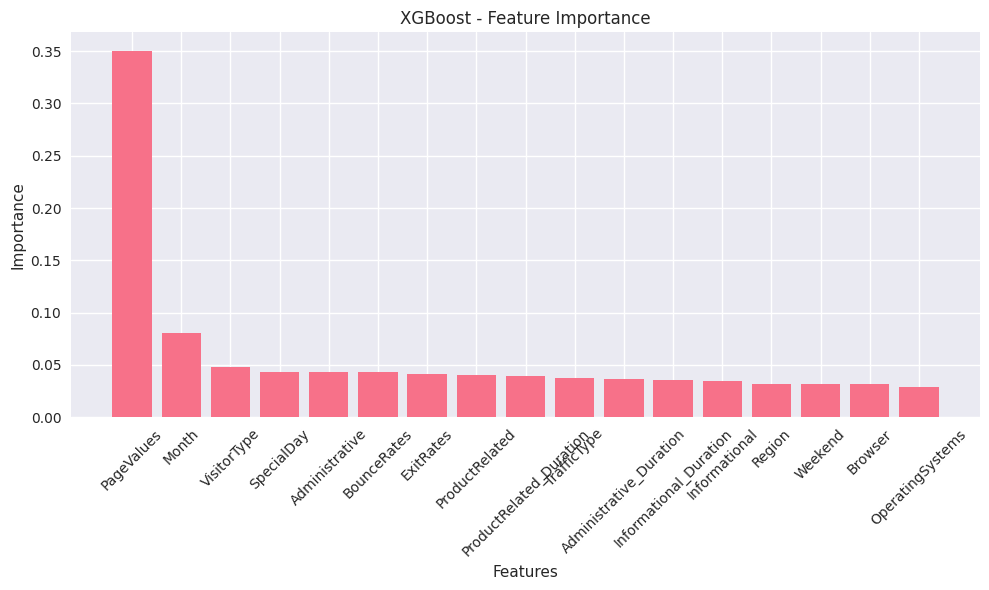

✅ Feature importance analysis completed for XGBoost
🔄 Computing permutation importance for XGBoost...


<Figure size 800x550 with 0 Axes>

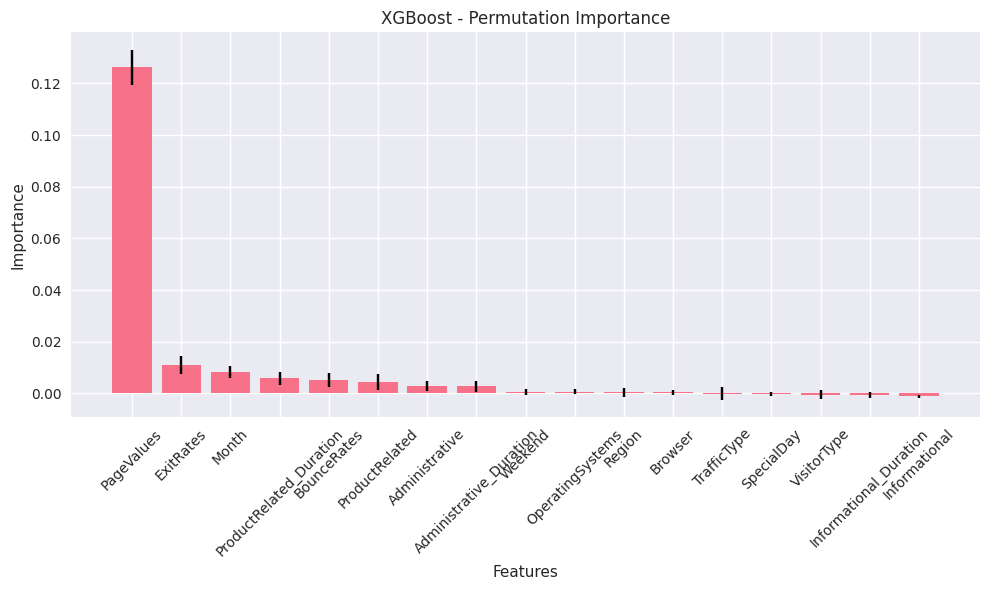

✅ Permutation importance analysis completed for XGBoost
🔄 Computing SHAP values for XGBoost...


<Figure size 800x550 with 0 Axes>

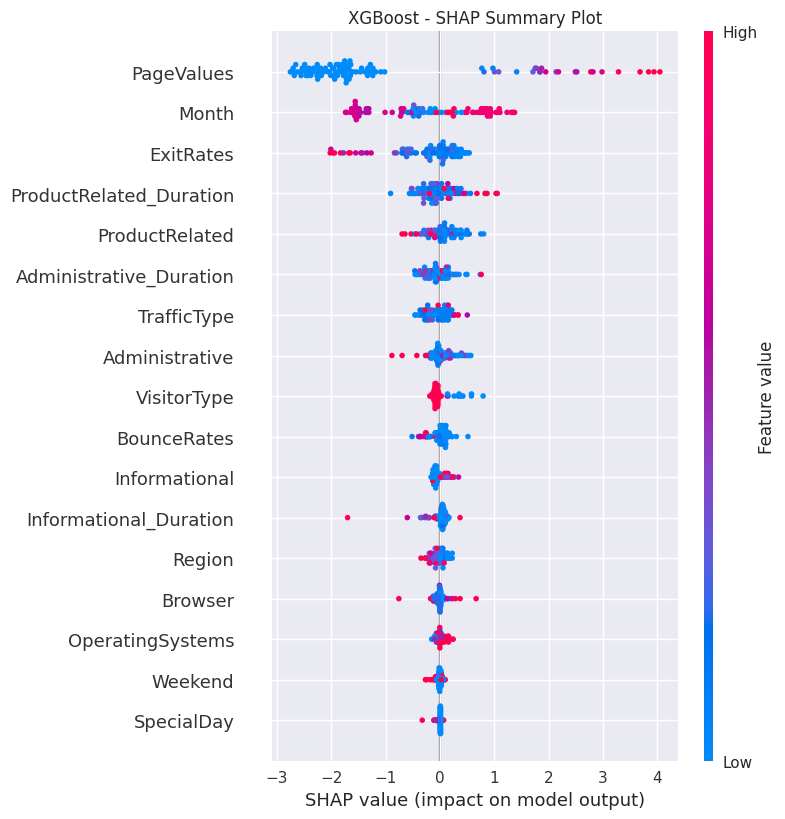

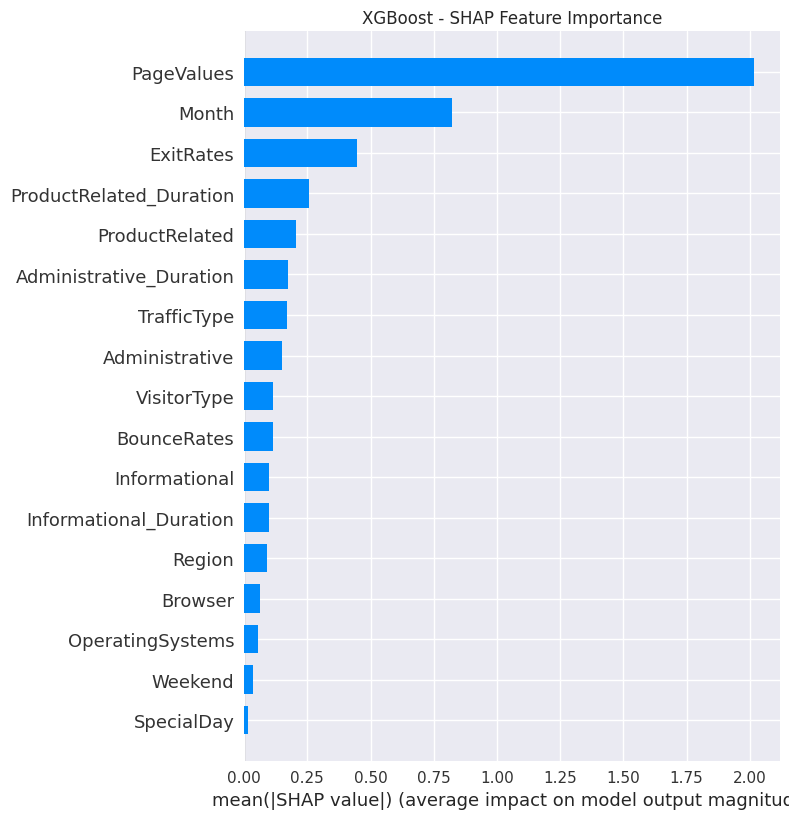

✅ SHAP analysis completed for XGBoost
🔄 Computing LIME explanations for XGBoost...


<Figure size 800x550 with 0 Axes>

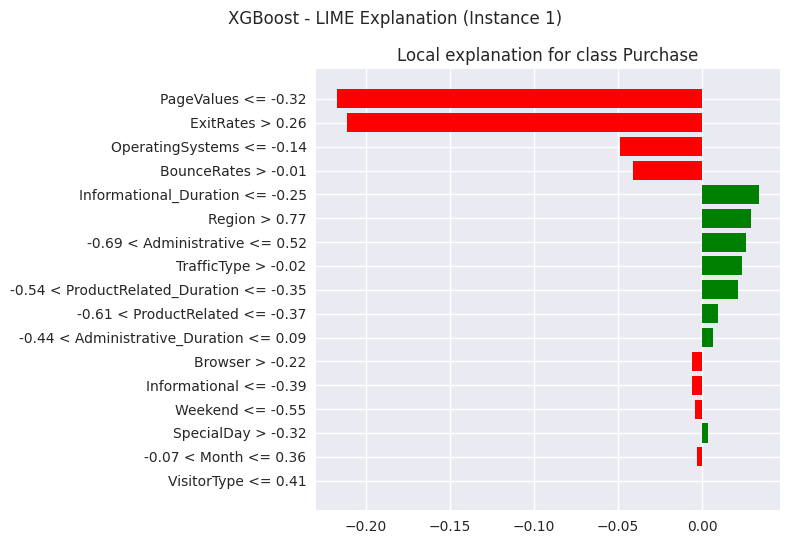

<Figure size 800x550 with 0 Axes>

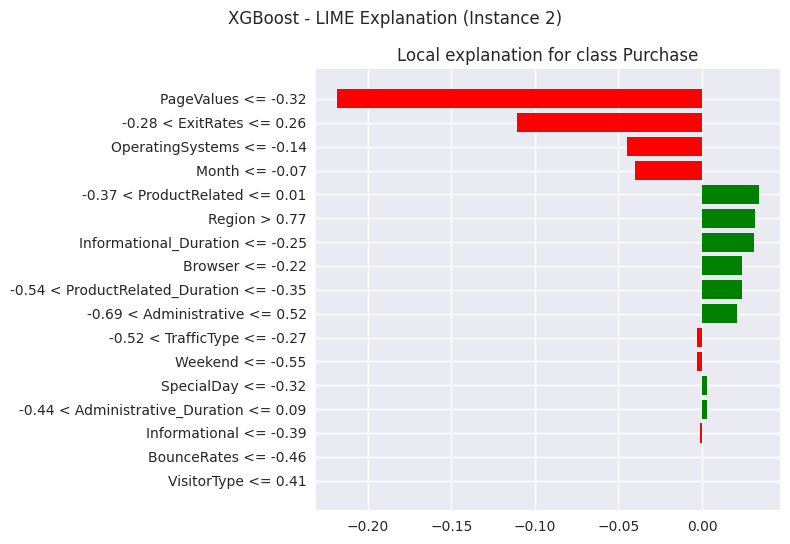

<Figure size 800x550 with 0 Axes>

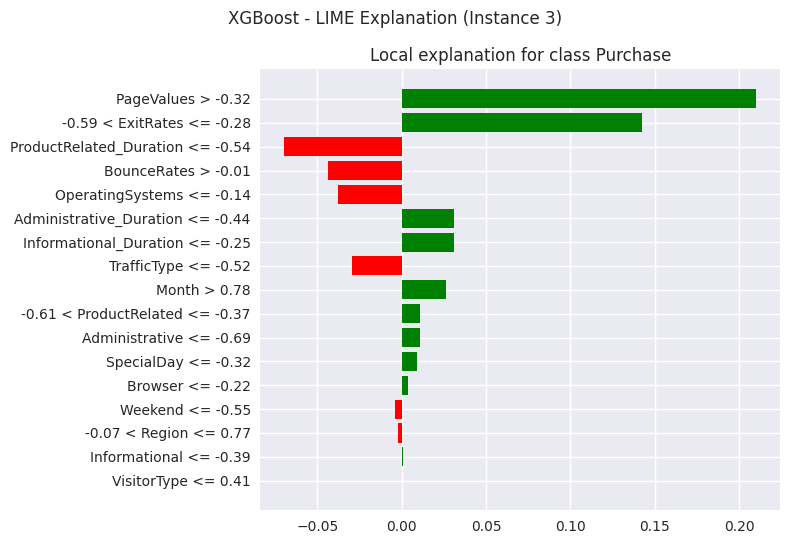

✅ LIME analysis completed for XGBoost


<Figure size 800x550 with 0 Axes>

In [31]:
# Initialize explainability analyzer
explainer = ExplainabilityAnalyzer(feature_names=feature_names)

# Analyze XGBoost (most interpretable)
print("\n" + "="*60)
print("EXPLAINABILITY ANALYSIS")
print("="*60)

xgb_explanations = explainer.analyze_model_explainability(
    models['XGBoost'], "XGBoost", 
    X_train_scaled, X_test_scaled, y_train, y_test,
    max_samples=100
)


🔍 Explainability Analysis for TabPFN v2
⚠️  TabPFN v2 doesn't have built-in feature importance
🔄 Computing permutation importance for TabPFN v2...
❌ Error in SHAP analysis: CUDA error: invalid configuration argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

Consider installing shap: pip install shap
🔄 Computing LIME explanations for TabPFN v2...


<Figure size 800x550 with 0 Axes>

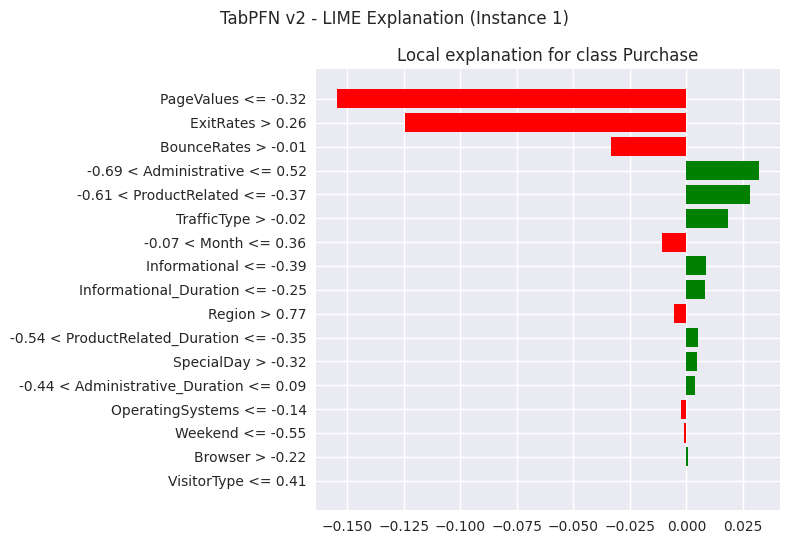

<Figure size 800x550 with 0 Axes>

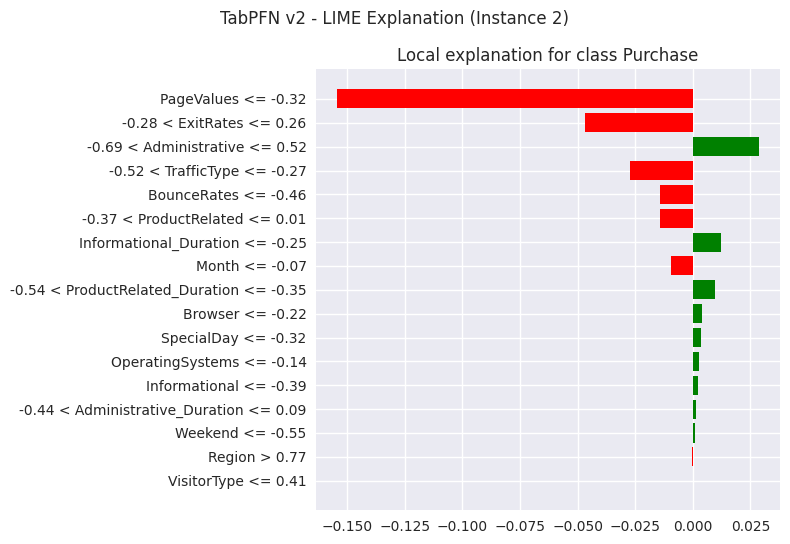

<Figure size 800x550 with 0 Axes>

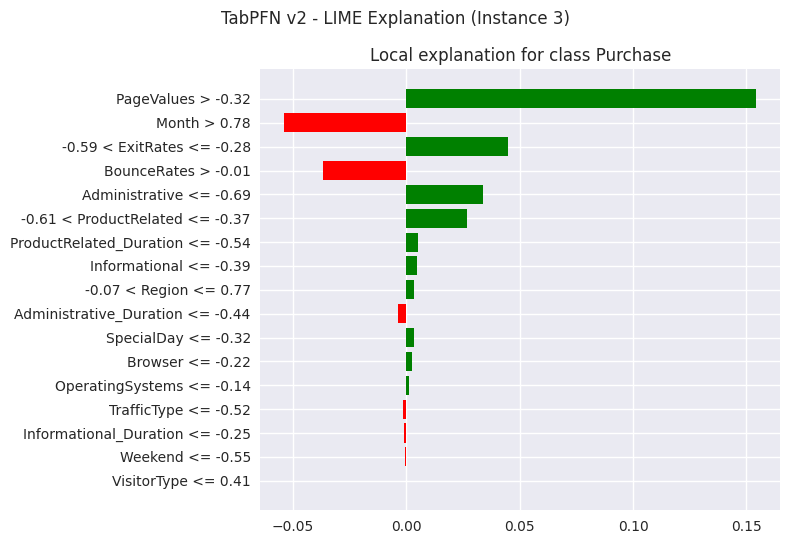

✅ LIME analysis completed for TabPFN v2


<Figure size 800x550 with 0 Axes>

In [13]:
# Analyze TabPFN v2 explainability
tabpfn_explanations = explainer.analyze_model_explainability(
    models['TabPFN v2'], "TabPFN v2", 
    X_train_scaled, X_test_scaled, y_train, y_test,
    max_samples=100
)


🔍 Feature Importance Comparison


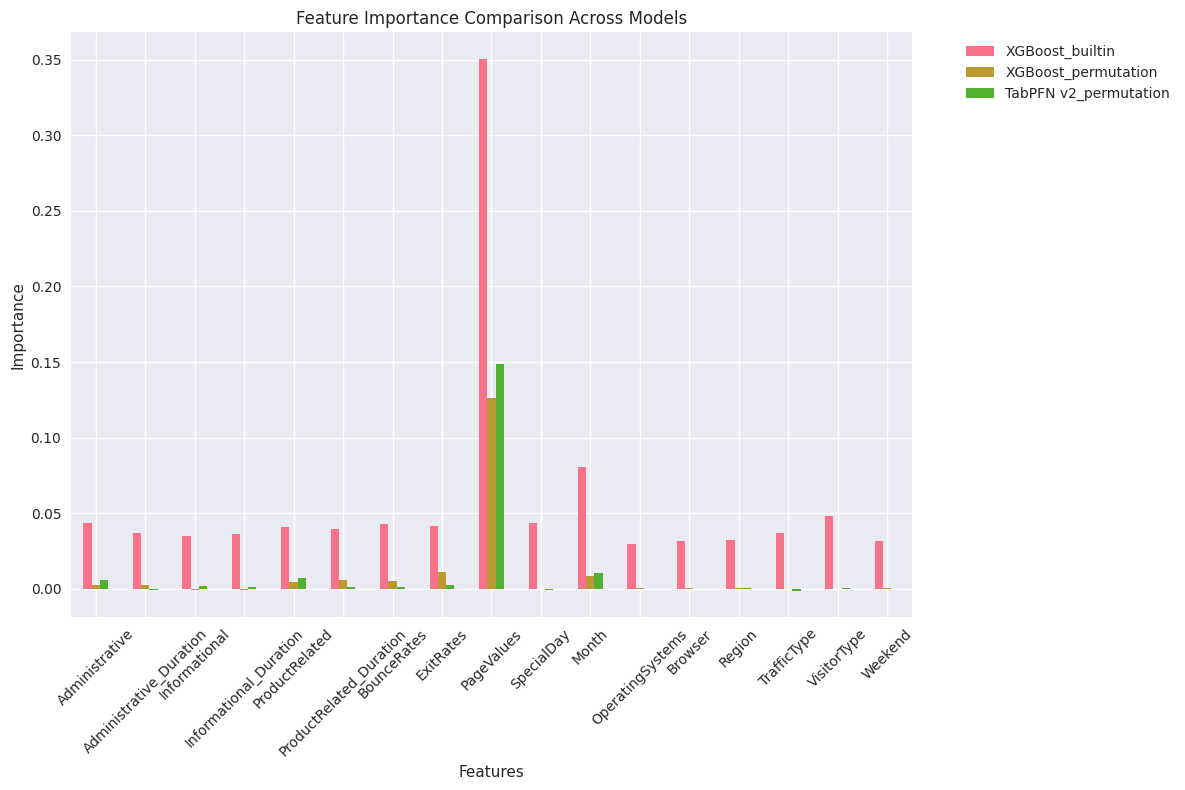


📋 Explainability Report for XGBoost

🎯 Top 5 Most Important Features (Built-in):
   1. PageValues: 0.3505
   2. Month: 0.0806
   3. VisitorType: 0.0480
   4. SpecialDay: 0.0436
   5. Administrative: 0.0433

🔄 Top 5 Most Important Features (Permutation):
   1. PageValues: 0.1262
   2. ExitRates: 0.0110
   3. Month: 0.0083
   4. ProductRelated_Duration: 0.0058
   5. BounceRates: 0.0051

🎭 Top 5 Most Important Features (SHAP):
   1. PageValues: 2.0185
   2. Month: 0.8231
   3. ExitRates: 0.4473
   4. ProductRelated_Duration: 0.2584
   5. ProductRelated: 0.2072

✅ Explainability analysis complete for XGBoost

📋 Explainability Report for TabPFN v2

🔄 Top 5 Most Important Features (Permutation):
   1. PageValues: 0.1486
   2. Month: 0.0105
   3. ProductRelated: 0.0074
   4. Administrative: 0.0060
   5. ExitRates: 0.0024

✅ Explainability analysis complete for TabPFN v2


<Figure size 800x550 with 0 Axes>

In [14]:
# Compare feature importance across models
importance_comparison = explainer.compare_feature_importance()

# Generate explanation reports
explainer.generate_explanation_report("XGBoost")
explainer.generate_explanation_report("TabPFN v2")

## 5. Class Imbalance Analysis

In [32]:
# Analyze performance on minority class
print("\n" + "="*60)
print("CLASS IMBALANCE ANALYSIS")
print("="*60)
print(xgb_model)
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

for model_name, model in models.items():
    print(model_name)
    if hasattr(model, 'predict'):
        y_pred = model.predict(X_test_scaled)
        
        # Per-class metrics
        precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
        
        print(f"\n{model_name} - Per-Class Performance:")
        print(f"  Class 0 (No Purchase): Precision={precision[0]:.4f}, Recall={recall[0]:.4f}, F1={f1[0]:.4f}")
        print(f"  Class 1 (Purchase): Precision={precision[1]:.4f}, Recall={recall[1]:.4f}, F1={f1[1]:.4f}")
        
        # Confusion matrix analysis
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        print(f"  True Negatives: {tn}, False Positives: {fp}")
        print(f"  False Negatives: {fn}, True Positives: {tp}")
        print(f"  Sensitivity (TPR): {tp/(tp+fn):.4f}")
        print(f"  Specificity (TNR): {tn/(tn+fp):.4f}")
        print(f"  False Positive Rate: {fp/(fp+tn):.4f}")
        print(f"  False Negative Rate: {fn/(fn+tp):.4f}")


CLASS IMBALANCE ANALYSIS
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)
XGBoost

XGBoost - Per-Class Performance:
  Class 0 (No Purchase): Precision=0.9233, Recall=0.9583, F1=0.9404
  Class 1 (Purchase): Precision=0.7129, Recall=0.5654, F1=0.6307
  True Negatives: 1997, F

## 6. Error Analysis

In [ ]:
# Analyze misclassified samples
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

# Focus on XGBoost for detailed error analysis
xgb_pred = models['XGBoost'].predict(X_test_scaled)
xgb_proba = models['XGBoost'].predict_proba(X_test_scaled)[:, 1]

# Find misclassified samples
misclassified_mask = (xgb_pred != y_test)
misclassified_indices = np.where(misclassified_mask)[0]

print(f"Total misclassified samples: {len(misclassified_indices)} out of {len(y_test)}")
print(f"Misclassification rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

# Analyze confidence of misclassified samples
misclassified_proba = xgb_proba[misclassified_mask]
correct_proba = xgb_proba[~misclassified_mask]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(misclassified_proba, bins=20, alpha=0.7, label='Misclassified', color='red')
plt.hist(correct_proba, bins=20, alpha=0.7, label='Correct', color='green')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Prediction Confidence Distribution')
plt.legend()

plt.subplot(1, 2, 2)
# Feature importance for misclassified samples
misclassified_features = X_test_scaled[misclassified_mask]
correct_features = X_test_scaled[~misclassified_mask]

feature_diff = np.mean(misclassified_features, axis=0) - np.mean(correct_features, axis=0)
sorted_indices = np.argsort(np.abs(feature_diff))[::-1][:10]

plt.bar(range(10), feature_diff[sorted_indices])
plt.xlabel('Features')
plt.ylabel('Mean Difference (Misclassified - Correct)')
plt.title('Feature Differences in Misclassified Samples')
plt.xticks(range(10), [feature_names[i] for i in sorted_indices], rotation=45)

plt.tight_layout()
plt.show()

print(f"\nTop 5 features with largest differences in misclassified samples:")
for i, idx in enumerate(sorted_indices[:5]):
    print(f"   {i+1}. {feature_names[idx]}: {feature_diff[idx]:.4f}")

# Extended Error Analysis for TabICL and TabPFN

This notebook extends the error analysis from the comprehensive comparison to include detailed analysis of TabICL and TabPFN models. It builds upon the comprehensive comparison notebook and assumes the following variables are available:

- **Models**: `models` dictionary containing XGBoost, TabPFN v2, and TabICL
- **Data**: `X_train_scaled`, `X_test_scaled`, `y_train`, `y_test`
- **Features**: `feature_names` list

## Analysis Components:
1. **Cross-Model Error Comparison**: Compare error patterns across all models
2. **Model-Specific Error Analysis**: Deep dive into TabICL and TabPFN errors
3. **Confidence Analysis**: Prediction confidence comparison
4. **Feature-based Error Analysis**: Which features cause errors in each model
5. **Error Overlap Analysis**: Common vs unique errors across models
6. **Uncertainty Quantification**: Model uncertainty in predictions

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Extended Error Analysis Framework Loaded")
print("Ready to analyze TabICL and TabPFN error patterns")

In [ ]:
# Verify required variables from comprehensive comparison notebook
required_vars = [
    'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test', 
    'feature_names', 'models'
]

print("🔍 Verifying Required Resources:")
for var_name in required_vars:
    if var_name in globals():
        if var_name == 'models':
            print(f"   ✅ {var_name}: {list(models.keys())}")
        elif var_name in ['X_train_scaled', 'X_test_scaled']:
            print(f"   ✅ {var_name}: shape {globals()[var_name].shape}")
        elif var_name in ['y_train', 'y_test']:
            print(f"   ✅ {var_name}: length {len(globals()[var_name])}")
        elif var_name == 'feature_names':
            print(f"   ✅ {var_name}: {len(feature_names)} features")
        else:
            print(f"   ✅ {var_name}: available")
    else:
        print(f"   ❌ {var_name}: NOT FOUND - Please run comprehensive comparison notebook first")

# Define model names for analysis
model_names = list(models.keys())
print(f"\n📊 Models available for error analysis: {model_names}")

## 1. Cross-Model Error Comparison

First, let's get predictions from all models and compare their error patterns.

In [ ]:
# Get predictions and probabilities from all models
predictions = {}
probabilities = {}
misclassified_indices = {}

print("🔮 Generating predictions from all models...")

for model_name, model in models.items():
    print(f"   Processing {model_name}...")
    
    # Get predictions
    y_pred = model.predict(X_test_scaled)
    predictions[model_name] = y_pred
    
    # Get probabilities if available
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        probabilities[model_name] = y_proba
    else:
        probabilities[model_name] = None
    
    # Find misclassified samples
    misclassified_mask = (y_pred != y_test)
    misclassified_indices[model_name] = np.where(misclassified_mask)[0]
    
    print(f"     Misclassified: {len(misclassified_indices[model_name])} / {len(y_test)} "
          f"({len(misclassified_indices[model_name])/len(y_test)*100:.2f}%)")

print("\n✅ Predictions generated for all models")

In [ ]:
# Create comprehensive error comparison table
error_comparison = []

for model_name in model_names:
    y_pred = predictions[model_name]
    
    # Calculate detailed metrics
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    error_comparison.append({
        'Model': model_name,
        'Total_Errors': len(misclassified_indices[model_name]),
        'Error_Rate_%': len(misclassified_indices[model_name])/len(y_test)*100,
        'False_Positives': fp,
        'False_Negatives': fn,
        'FP_Rate_%': fp/(fp+tn)*100,
        'FN_Rate_%': fn/(fn+tp)*100,
        'Precision_Class_0': precision[0],
        'Precision_Class_1': precision[1],
        'Recall_Class_0': recall[0],
        'Recall_Class_1': recall[1],
        'F1_Class_0': f1[0],
        'F1_Class_1': f1[1]
    })

error_df = pd.DataFrame(error_comparison)

print("📊 CROSS-MODEL ERROR COMPARISON")
print("=" * 80)
print(error_df.round(4).to_string(index=False))

# Save results
error_df.to_csv('cross_model_error_comparison.csv', index=False)
print("\n💾 Results saved to 'cross_model_error_comparison.csv'")

In [ ]:
# Visualize error comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total Error Rate Comparison
ax1.bar(error_df['Model'], error_df['Error_Rate_%'], 
        color=['skyblue', 'lightcoral', 'lightgreen'][:len(model_names)])
ax1.set_title('Total Error Rate Comparison')
ax1.set_ylabel('Error Rate (%)')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(error_df['Error_Rate_%']):
    ax1.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

# 2. False Positive vs False Negative Rates
x = np.arange(len(model_names))
width = 0.35

ax2.bar(x - width/2, error_df['FP_Rate_%'], width, label='False Positive Rate', color='red', alpha=0.7)
ax2.bar(x + width/2, error_df['FN_Rate_%'], width, label='False Negative Rate', color='blue', alpha=0.7)
ax2.set_title('False Positive vs False Negative Rates')
ax2.set_ylabel('Rate (%)')
ax2.set_xticks(x)
ax2.set_xticklabels(error_df['Model'], rotation=45)
ax2.legend()

# 3. Class-wise Precision Comparison
ax3.bar(x - width/2, error_df['Precision_Class_0'], width, label='Class 0 (No Purchase)', color='orange', alpha=0.7)
ax3.bar(x + width/2, error_df['Precision_Class_1'], width, label='Class 1 (Purchase)', color='green', alpha=0.7)
ax3.set_title('Class-wise Precision Comparison')
ax3.set_ylabel('Precision')
ax3.set_xticks(x)
ax3.set_xticklabels(error_df['Model'], rotation=45)
ax3.legend()
ax3.set_ylim(0, 1)

# 4. Class-wise Recall Comparison
ax4.bar(x - width/2, error_df['Recall_Class_0'], width, label='Class 0 (No Purchase)', color='purple', alpha=0.7)
ax4.bar(x + width/2, error_df['Recall_Class_1'], width, label='Class 1 (Purchase)', color='brown', alpha=0.7)
ax4.set_title('Class-wise Recall Comparison')
ax4.set_ylabel('Recall')
ax4.set_xticks(x)
ax4.set_xticklabels(error_df['Model'], rotation=45)
ax4.legend()
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('cross_model_error_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Model-Specific Confidence Analysis

Analyze prediction confidence for each model to understand uncertainty patterns.

In [ ]:
# Confidence analysis for each model
print("🎯 CONFIDENCE ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(1, len(model_names), figsize=(5*len(model_names), 5))
if len(model_names) == 1:
    axes = [axes]

confidence_stats = []

for i, model_name in enumerate(model_names):
    if probabilities[model_name] is not None:
        y_proba = probabilities[model_name]
        misclassified_mask = (predictions[model_name] != y_test)
        
        misclassified_proba = y_proba[misclassified_mask]
        correct_proba = y_proba[~misclassified_mask]
        
        # Plot confidence distributions
        axes[i].hist(misclassified_proba, bins=20, alpha=0.7, label='Misclassified', 
                    color='red', density=True)
        axes[i].hist(correct_proba, bins=20, alpha=0.7, label='Correct', 
                    color='green', density=True)
        axes[i].set_xlabel('Prediction Probability')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{model_name}\nConfidence Distribution')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Calculate confidence statistics
        confidence_stats.append({
            'Model': model_name,
            'Avg_Confidence_Correct': np.mean(np.maximum(correct_proba, 1-correct_proba)),
            'Avg_Confidence_Misclassified': np.mean(np.maximum(misclassified_proba, 1-misclassified_proba)),
            'Std_Confidence_Correct': np.std(np.maximum(correct_proba, 1-correct_proba)),
            'Std_Confidence_Misclassified': np.std(np.maximum(misclassified_proba, 1-misclassified_proba)),
            'Low_Confidence_Errors_%': np.mean(np.maximum(misclassified_proba, 1-misclassified_proba) < 0.6) * 100
        })
        
        print(f"\n{model_name} Confidence Analysis:")
        print(f"   Average confidence (correct): {confidence_stats[-1]['Avg_Confidence_Correct']:.4f}")
        print(f"   Average confidence (misclassified): {confidence_stats[-1]['Avg_Confidence_Misclassified']:.4f}")
        print(f"   Low confidence errors (<60%): {confidence_stats[-1]['Low_Confidence_Errors_%']:.1f}%")
    else:
        axes[i].text(0.5, 0.5, f'{model_name}\nNo probability\navailable', 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{model_name}\nConfidence Distribution')

plt.tight_layout()
plt.savefig('model_confidence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create confidence statistics table
if confidence_stats:
    confidence_df = pd.DataFrame(confidence_stats)
    print("\n📊 CONFIDENCE STATISTICS")
    print(confidence_df.round(4).to_string(index=False))
    confidence_df.to_csv('model_confidence_statistics.csv', index=False)

## 3. Feature-based Error Analysis

Analyze which features are most associated with errors in each model.

In [ ]:
# Feature-based error analysis for each model
print("🔍 FEATURE-BASED ERROR ANALYSIS")
print("=" * 60)

feature_error_analysis = {}

for model_name in model_names:
    print(f"\nAnalyzing {model_name}...")
    
    misclassified_mask = (predictions[model_name] != y_test)
    
    if np.sum(misclassified_mask) > 0:
        misclassified_features = X_test_scaled[misclassified_mask]
        correct_features = X_test_scaled[~misclassified_mask]
        
        # Calculate feature differences
        feature_diff = np.mean(misclassified_features, axis=0) - np.mean(correct_features, axis=0)
        feature_std_diff = np.std(misclassified_features, axis=0) - np.std(correct_features, axis=0)
        
        # Statistical significance test (t-test)
        from scipy.stats import ttest_ind
        p_values = []
        for i in range(len(feature_names)):
            _, p_val = ttest_ind(misclassified_features[:, i], correct_features[:, i])
            p_values.append(p_val)
        
        feature_error_analysis[model_name] = {
            'feature_diff': feature_diff,
            'feature_std_diff': feature_std_diff,
            'p_values': np.array(p_values),
            'significant_features': np.array(p_values) < 0.05
        }
        
        # Print top features with significant differences
        significant_indices = np.where(np.array(p_values) < 0.05)[0]
        if len(significant_indices) > 0:
            sorted_sig_indices = significant_indices[np.argsort(np.abs(feature_diff[significant_indices]))[::-1]]
            
            print(f"   Top 5 significant features (p < 0.05):")
            for i, idx in enumerate(sorted_sig_indices[:5]):
                print(f"     {i+1}. {feature_names[idx]}: diff={feature_diff[idx]:.4f}, p={p_values[idx]:.4f}")
        else:
            print(f"   No statistically significant feature differences found")
    else:
        print(f"   No misclassified samples for {model_name}")
        feature_error_analysis[model_name] = None

In [ ]:
# Visualize feature differences across models
n_models = len([m for m in model_names if feature_error_analysis[m] is not None])
if n_models > 0:
    fig, axes = plt.subplots(n_models, 1, figsize=(14, 5*n_models))
    if n_models == 1:
        axes = [axes]
    
    plot_idx = 0
    for model_name in model_names:
        if feature_error_analysis[model_name] is not None:
            feature_diff = feature_error_analysis[model_name]['feature_diff']
            p_values = feature_error_analysis[model_name]['p_values']
            
            # Sort features by absolute difference
            sorted_indices = np.argsort(np.abs(feature_diff))[::-1][:10]
            
            # Create bar plot
            bars = axes[plot_idx].bar(range(10), feature_diff[sorted_indices], 
                                     color=['red' if p_values[i] < 0.05 else 'lightblue' 
                                           for i in sorted_indices])
            
            axes[plot_idx].set_xlabel('Features')
            axes[plot_idx].set_ylabel('Mean Difference (Misclassified - Correct)')
            axes[plot_idx].set_title(f'{model_name}: Feature Differences in Misclassified Samples\n(Red bars: p < 0.05)')
            axes[plot_idx].set_xticks(range(10))
            axes[plot_idx].set_xticklabels([feature_names[i] for i in sorted_indices], rotation=45, ha='right')
            axes[plot_idx].grid(True, alpha=0.3)
            
            # Add value labels
            for i, (bar, idx) in enumerate(zip(bars, sorted_indices)):
                height = bar.get_height()
                axes[plot_idx].text(bar.get_x() + bar.get_width()/2., height + np.sign(height)*0.001,
                                   f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top')
            
            plot_idx += 1
    
    plt.tight_layout()
    plt.savefig('feature_error_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

## 4. Error Overlap Analysis

Analyze which samples are commonly misclassified across models vs model-specific errors.

In [ ]:
# Error overlap analysis
print("🔄 ERROR OVERLAP ANALYSIS")
print("=" * 60)

# Create error matrix (samples x models)
error_matrix = np.zeros((len(y_test), len(model_names)), dtype=bool)

for i, model_name in enumerate(model_names):
    misclassified_mask = (predictions[model_name] != y_test)
    error_matrix[:, i] = misclassified_mask

# Analyze overlap patterns
overlap_analysis = {}

# Common errors (misclassified by all models)
common_errors = np.all(error_matrix, axis=1)
overlap_analysis['common_errors'] = np.sum(common_errors)

# Model-specific errors
for i, model_name in enumerate(model_names):
    # Errors unique to this model
    other_models_correct = ~np.any(error_matrix[:, [j for j in range(len(model_names)) if j != i]], axis=1)
    unique_errors = error_matrix[:, i] & other_models_correct
    overlap_analysis[f'{model_name}_unique'] = np.sum(unique_errors)

# Pairwise overlaps
pairwise_overlaps = {}
for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        overlap = np.sum(error_matrix[:, i] & error_matrix[:, j])
        pairwise_overlaps[f'{model_names[i]}_vs_{model_names[j]}'] = overlap

print(f"\nError Overlap Statistics:")
print(f"   Common errors (all models): {overlap_analysis['common_errors']}")
for model_name in model_names:
    print(f"   {model_name} unique errors: {overlap_analysis[f'{model_name}_unique']}")

print(f"\nPairwise Error Overlaps:")
for pair, overlap in pairwise_overlaps.items():
    print(f"   {pair}: {overlap}")

In [ ]:
# Visualize error overlap patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Error overlap heatmap
overlap_matrix = np.zeros((len(model_names), len(model_names)))
for i in range(len(model_names)):
    for j in range(len(model_names)):
        if i == j:
            overlap_matrix[i, j] = np.sum(error_matrix[:, i])  # Total errors for diagonal
        else:
            overlap_matrix[i, j] = np.sum(error_matrix[:, i] & error_matrix[:, j])  # Overlap

sns.heatmap(overlap_matrix, annot=True, fmt='.0f', cmap='Reds', 
            xticklabels=model_names, yticklabels=model_names, ax=ax1)
ax1.set_title('Error Overlap Matrix\n(Diagonal: Total Errors, Off-diagonal: Overlaps)')

# 2. Unique vs shared errors
unique_errors = [overlap_analysis[f'{model}_unique'] for model in model_names]
total_errors = [np.sum(error_matrix[:, i]) for i in range(len(model_names))]
shared_errors = [total - unique for total, unique in zip(total_errors, unique_errors)]

x = np.arange(len(model_names))
width = 0.35

ax2.bar(x, unique_errors, width, label='Unique Errors', color='red', alpha=0.7)
ax2.bar(x, shared_errors, width, bottom=unique_errors, label='Shared Errors', color='blue', alpha=0.7)
ax2.set_title('Unique vs Shared Errors by Model')
ax2.set_ylabel('Number of Errors')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45)
ax2.legend()

# 3. Error agreement percentage
agreement_data = []
for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        total_errors_i = np.sum(error_matrix[:, i])
        total_errors_j = np.sum(error_matrix[:, j])
        overlap = np.sum(error_matrix[:, i] & error_matrix[:, j])
        agreement_data.append({
            'model_pair': f'{model_names[i]} vs {model_names[j]}',
            'overlap': overlap,
            'agreement_%': (overlap / max(total_errors_i, total_errors_j)) * 100 if max(total_errors_i, total_errors_j) > 0 else 0
        })

if agreement_data:
    agreement_df = pd.DataFrame(agreement_data)
    ax3.bar(range(len(agreement_data)), agreement_df['agreement_%'], color='lightcoral')
    ax3.set_title('Error Agreement Percentage')
    ax3.set_ylabel('Agreement (%)')
    ax3.set_xticks(range(len(agreement_data)))
    ax3.set_xticklabels(agreement_df['model_pair'], rotation=45, ha='right')
    ax3.grid(True, alpha=0.3)

# 4. Summary statistics
ax4.axis('off')
summary_text = f"""ERROR OVERLAP SUMMARY

Total Test Samples: {len(y_test)}
Common Errors (All Models): {overlap_analysis['common_errors']}

Model-Specific Errors:
"""

for model_name in model_names:
    unique_count = overlap_analysis[f'{model_name}_unique']
    total_count = np.sum(error_matrix[:, model_names.index(model_name)])
    summary_text += f"  {model_name}: {unique_count}/{total_count} unique\n"

ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.savefig('error_overlap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Model-Specific Error Insights

Generate detailed insights for TabICL and TabPFN error patterns.

In [ ]:
# Generate model-specific error insights
print("🔍 MODEL-SPECIFIC ERROR INSIGHTS")
print("=" * 80)

for model_name in model_names:
    print(f"\n📊 {model_name.upper()} ERROR ANALYSIS")
    print("-" * 60)
    
    # Basic error statistics
    total_errors = len(misclassified_indices[model_name])
    error_rate = total_errors / len(y_test) * 100
    unique_errors = overlap_analysis[f'{model_name}_unique']
    
    print(f"Total Errors: {total_errors} ({error_rate:.2f}%)")
    print(f"Unique Errors: {unique_errors} ({unique_errors/total_errors*100:.1f}% of model errors)")
    
    # Confidence analysis (if available)
    if probabilities[model_name] is not None:
        conf_stats = next((cs for cs in confidence_stats if cs['Model'] == model_name), None)
        if conf_stats:
            print(f"Average Confidence (Correct): {conf_stats['Avg_Confidence_Correct']:.3f}")
            print(f"Average Confidence (Errors): {conf_stats['Avg_Confidence_Misclassified']:.3f}")
            print(f"Low Confidence Errors: {conf_stats['Low_Confidence_Errors_%']:.1f}%")
    
    # Feature analysis
    if feature_error_analysis[model_name] is not None:
        feature_data = feature_error_analysis[model_name]
        significant_features = np.sum(feature_data['significant_features'])
        print(f"Significant Feature Differences: {significant_features}/{len(feature_names)}")
        
        # Top problematic features
        if significant_features > 0:
            sig_indices = np.where(feature_data['significant_features'])[0]
            top_sig = sig_indices[np.argsort(np.abs(feature_data['feature_diff'][sig_indices]))[::-1]][:3]
            print("Top 3 Problematic Features:")
            for i, idx in enumerate(top_sig):
                print(f"  {i+1}. {feature_names[idx]}: {feature_data['feature_diff'][idx]:.4f}")
    
    # Model-specific insights
    if 'TabPFN' in model_name:
        print("\n🧠 TabPFN-Specific Insights:")
        print("  - Prior-based predictions may struggle with out-of-distribution samples")
        print("  - Consider context size optimization for better performance")
        print("  - Errors may indicate dataset shift from pretraining distribution")
    
    elif 'TabICL' in model_name:
        print("\n🎯 TabICL-Specific Insights:")
        print("  - In-context learning errors may indicate poor example selection")
        print("  - Consider diverse example selection strategies")
        print("  - Context window utilization may need optimization")
    
    elif 'XGBoost' in model_name:
        print("\n🌳 XGBoost-Specific Insights:")
        print("  - Tree-based errors often indicate feature interaction issues")
        print("  - Consider feature engineering or hyperparameter tuning")
        print("  - May benefit from ensemble methods")

## 7. Summary and Recommendations

Comprehensive summary of error analysis findings and actionable recommendations.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Extended Error Analysis Framework Loaded")
print("Ready to analyze TabICL and TabPFN error patterns")

# Enhanced Ablation Studies Integration

In [15]:
# Initialize ablation study analyzer
ablation_analyzer = AblationStudyAnalyzer()

print("\n" + "="*60)
print("ABLATION STUDIES")
print("="*60)


ABLATION STUDIES



🔬 Feature Ablation Study for XGBoost
📊 Baseline Performance (All Features):
   Accuracy: 0.8974
   F1-Score: 0.6307
   AUC: 0.9212

🔍 Single Feature Removal Analysis...

🎯 Top 5 Most Important Features (by F1 drop when removed):
   1. PageValues: F1 drop = 0.3721
   2. Month: F1 drop = 0.0268
   3. Region: F1 drop = 0.0064
   4. TrafficType: F1 drop = 0.0039
   5. Weekend: F1 drop = 0.0037

🔍 Multiple Feature Removal Analysis...
   Testing removal of 2 features...
   Testing removal of 3 features...

🔍 Feature Group Removal Analysis...

🎯 Feature Group Importance (by F1 drop when removed):
   1. Behavior_Metrics: F1 drop = 0.4106
   2. Temporal: F1 drop = 0.0144
   3. Administrative: F1 drop = 0.0102
   4. Technical: F1 drop = 0.0067
   5. ProductRelated: F1 drop = -0.0014
   6. Informational: F1 drop = -0.0089
   7. User_Type: F1 drop = -0.0136


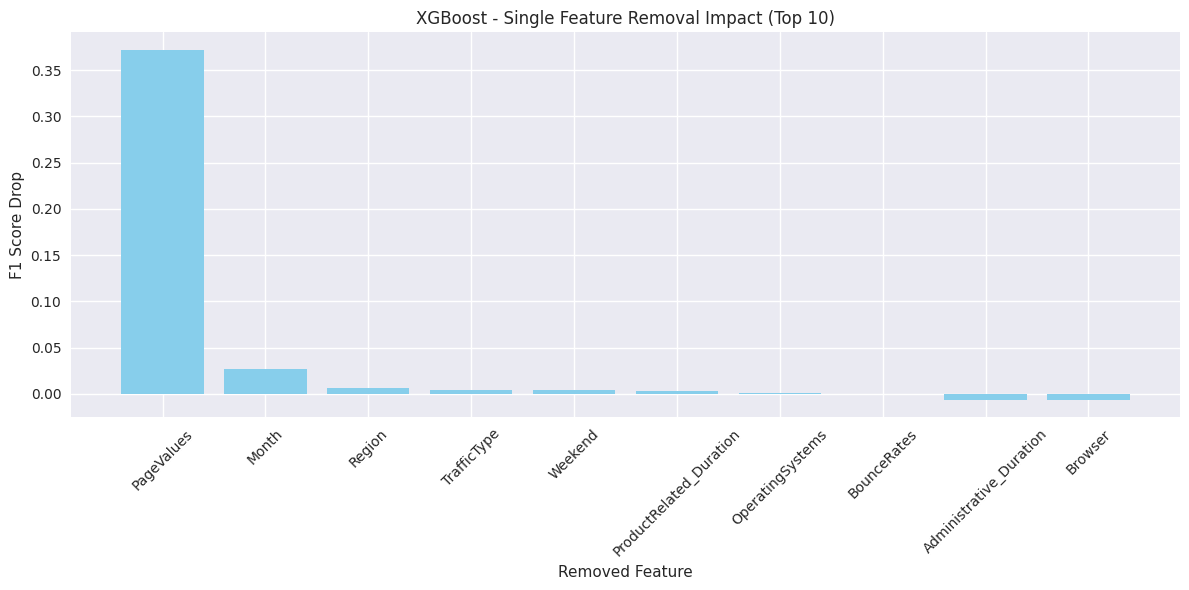

<Figure size 800x550 with 0 Axes>

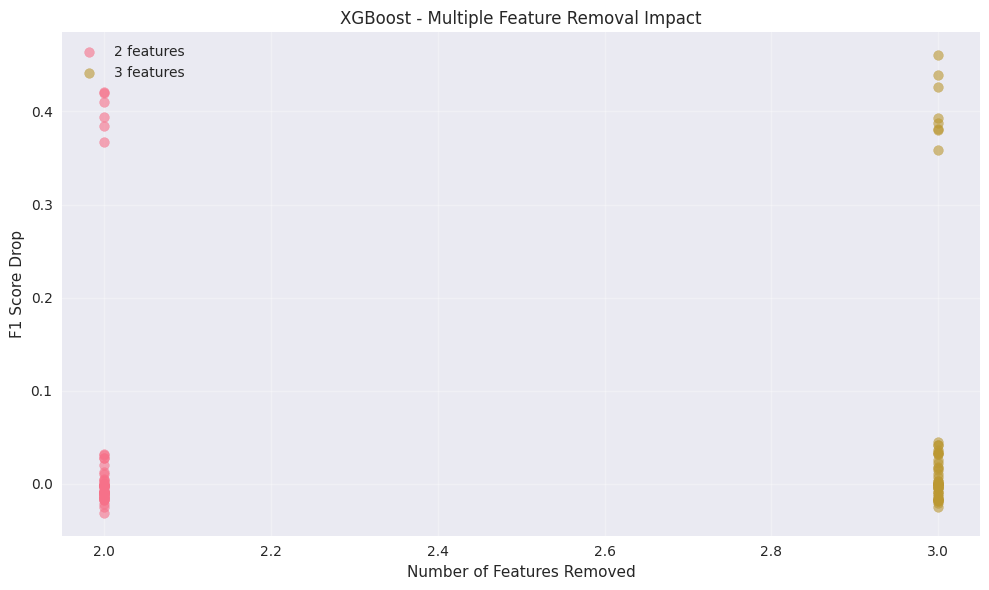

<Figure size 800x550 with 0 Axes>

In [16]:
# Feature ablation study for XGBoost
xgb_ablation = ablation_analyzer.feature_ablation_study(
    models['XGBoost'], "XGBoost",
    X_train_scaled, X_test_scaled, y_train, y_test,
    feature_names=feature_names,
    max_features_to_remove=3
)


⚙️  Hyperparameter Ablation Study for XGBoost
📊 Baseline F1 Score (default params): 0.6291
🔍 Searching hyperparameter space...
🎯 Best F1 Score: 0.6372
📈 Improvement: 0.0081
🔧 Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


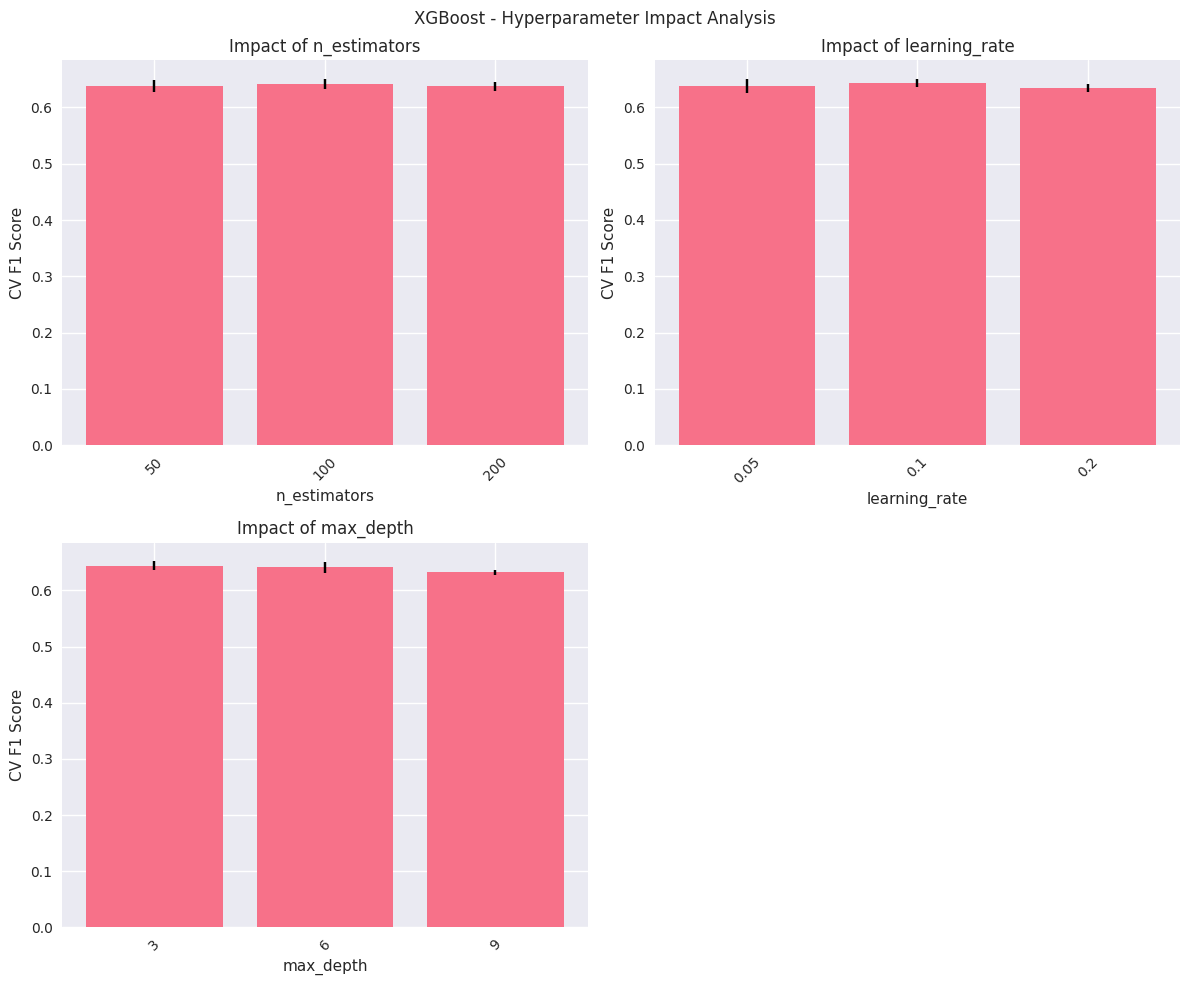

<Figure size 800x550 with 0 Axes>

In [17]:
# Hyperparameter ablation study for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

xgb_hyperparam_ablation = ablation_analyzer.hyperparameter_ablation_study(
    xgb.XGBClassifier, "XGBoost",
    X_train_scaled, X_test_scaled, y_train, y_test,
    xgb_param_grid, cv_folds=3
)


📊 Data Size Ablation Study for XGBoost
    10% data: F1 = 0.5706, Time = 0.09s
    20% data: F1 = 0.5740, Time = 0.12s
    30% data: F1 = 0.6096, Time = 0.13s
    50% data: F1 = 0.6147, Time = 0.18s
    70% data: F1 = 0.6232, Time = 0.16s
    90% data: F1 = 0.6475, Time = 0.20s
   100% data: F1 = 0.6311, Time = 0.18s


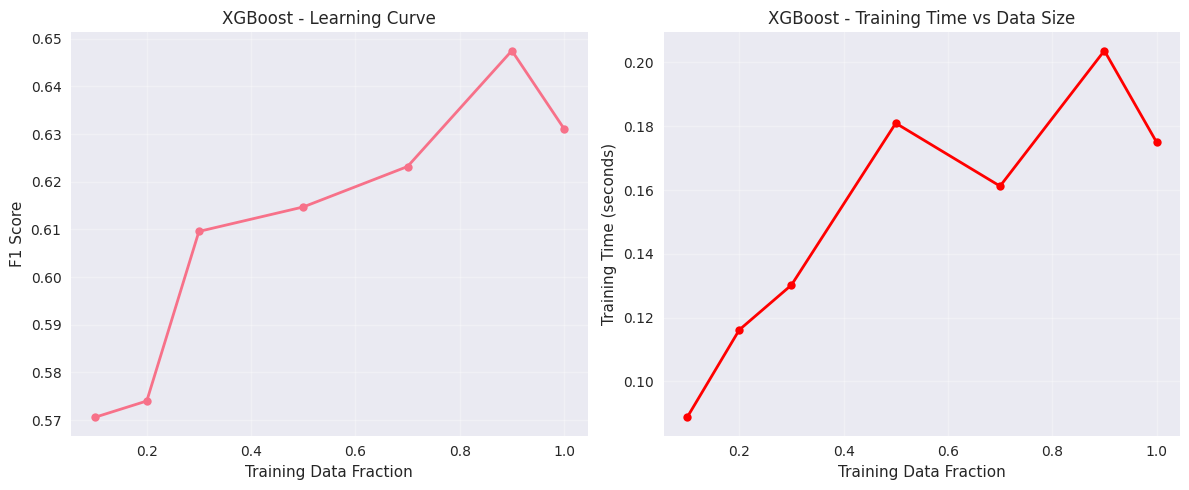

<Figure size 800x550 with 0 Axes>

In [34]:
# Data size ablation study
xgb_data_ablation = ablation_analyzer.data_size_ablation_study(
    models['XGBoost'], "XGBoost",
    X_train_scaled, X_test_scaled, y_train, y_test,
    size_fractions=[0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0]
)

In [35]:
# Generate ablation report
ablation_analyzer.generate_ablation_report("XGBoost")


📋 Ablation Study Report for XGBoost

📊 Baseline Performance:
   Accuracy: 0.8974
   F1-Score: 0.6307
   AUC: 0.9212

🎯 Most Critical Individual Features:
   1. PageValues: F1 drop = 0.3721
   2. Month: F1 drop = 0.0268
   3. Region: F1 drop = 0.0064

🎯 Most Critical Feature Groups:
   1. Behavior_Metrics: F1 drop = 0.4106
   2. Temporal: F1 drop = 0.0144
   3. Administrative: F1 drop = 0.0102

✅ Ablation study analysis complete for XGBoost




## Advanced TabICL and TabPFN Ablation Analysis

This notebook integrates enhanced ablation studies for TabICL and TabPFN models, building upon the comprehensive comparison analysis. It assumes that the following are already available from the comprehensive comparison notebook:

- **Preprocessed Data**: `X_train_scaled`, `X_test_scaled`, `y_train`, `y_test`, `feature_names`
- **Trained Models**: `models` dictionary containing XGBoost, TabPFN v2, and TabICL
- **Model Names**: `model_names` list

### Enhanced Ablation Studies Include:
- **TabPFN-Specific**: Context size optimization, device performance, memory efficiency
- **TabICL-Specific**: In-context learning examples, example selection strategies, context window utilization
- **Cross-Model Analysis**: Feature importance comparison, robustness analysis
- **Production Insights**: Performance recommendations and deployment considerations

## Import Enhanced Ablation Framework

In [ ]:
# Import enhanced ablation studies framework
from enhanced_ablation_studies import (
    EnhancedAblationStudyAnalyzer, 
    run_enhanced_ablation_studies,
    create_ablation_summary_dataframe,
    plot_ablation_dashboard
)

print("🔬 Enhanced Ablation Studies Framework Loaded")
print("Ready to perform advanced ablation analysis on TabICL and TabPFN models")

🔬 Enhanced Ablation Studies Framework Loaded
Ready to perform advanced ablation analysis on TabICL and TabPFN models


## Verify Available Resources

Let's confirm that all required resources from the comprehensive comparison are available.

In [ ]:
# Verify that required variables are available from comprehensive comparison notebook
required_vars = [
    'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test', 
    'feature_names', 'models', 'model_names'
]

model_names=['XGBoost', 'TabPFN v2', 'TabICL']
import os
os.environ['TABPFN_ALLOW_CPU_LARGE_DATASET'] = '1'
print("🔍 Verifying Required Resources:")
for var_name in required_vars:
    if var_name in globals():
        if var_name == 'models':
            print(f"   ✅ {var_name}: {list(models.keys())}")
        elif var_name in ['X_train_scaled', 'X_test_scaled']:
            print(f"   ✅ {var_name}: shape {globals()[var_name].shape}")
        elif var_name in ['y_train', 'y_test']:
            print(f"   ✅ {var_name}: length {len(globals()[var_name])}")
        elif var_name == 'feature_names':
            print(f"   ✅ {var_name}: {len(feature_names)} features")
        else:
            print(f"   ✅ {var_name}: available")
    else:
        print(f"   ❌ {var_name}: NOT FOUND - Please run comprehensive comparison notebook first")

print(f"\n📊 Models available for enhanced ablation studies: {model_names}")

🔍 Verifying Required Resources:
   ✅ X_train_scaled: shape (7891, 17)
   ✅ X_test_scaled: shape (2466, 17)
   ✅ y_train: length 7891
   ✅ y_test: length 2466
   ✅ feature_names: 17 features
   ✅ models: ['XGBoost', 'TabPFN v2', 'TabICL']
   ✅ model_names: available

📊 Models available for enhanced ablation studies: ['XGBoost', 'TabPFN v2', 'TabICL']


## Initialize Enhanced Ablation Studies

Now we'll run the comprehensive enhanced ablation studies specifically designed for TabICL and TabPFN.

In [ ]:
# Initialize enhanced ablation study analyzer
print("🚀 INITIALIZING ENHANCED ABLATION STUDIES")
print("=" * 80)

enhanced_analyzer = EnhancedAblationStudyAnalyzer()

# Run comprehensive ablation studies
print("\n🔬 Starting enhanced ablation analysis...")
print("This will perform model-specific ablations for TabICL and TabPFN")
print("Expected duration: 5-15 minutes depending on hardware")

enhanced_ablation_results = enhanced_analyzer.comprehensive_ablation_study(
    models_dict=models,
    model_names=model_names,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    feature_names=feature_names
)

🚀 INITIALIZING ENHANCED ABLATION STUDIES

🔬 Starting enhanced ablation analysis...
This will perform model-specific ablations for TabICL and TabPFN
Expected duration: 5-15 minutes depending on hardware
🔬 COMPREHENSIVE ABLATION STUDY

📊 Running ablation studies for XGBoost...
      🔍 Feature ablation study...
      📊 Data size ablation study...
      🔊 Noise robustness study...

📊 Running ablation studies for TabPFN v2...
      🔍 Feature ablation study...


## Enhanced Ablation Results Summary

In [ ]:
# Create comprehensive summary
ablation_summary_df = create_ablation_summary_dataframe(enhanced_ablation_results)

print("\n📊 ENHANCED ABLATION STUDY SUMMARY")
print("=" * 80)
print(ablation_summary_df.round(4).to_string())

# Save results for further analysis
ablation_summary_df.to_csv('enhanced_ablation_summary.csv', index=False)
print("\n💾 Results saved to 'enhanced_ablation_summary.csv'")

## Comprehensive Ablation Dashboard

In [ ]:
# Generate comprehensive dashboard
print("📈 Generating Enhanced Ablation Dashboard...")
plot_ablation_dashboard(enhanced_analyzer, model_names)

## TabPFN-Specific Enhanced Ablations

Deep dive into TabPFN-specific ablation studies including context size optimization, device performance analysis, and memory efficiency testing.

In [ ]:
# TabPFN-specific analysis
if 'TabPFN v2' in enhanced_ablation_results:
    tabpfn_results = enhanced_ablation_results['TabPFN v2']
    
    print("\n🔬 TABPFN ENHANCED ABLATION ANALYSIS")
    print("=" * 80)
    
    # Context Size Optimization
    if 'context_size_ablation' in tabpfn_results:
        context_results = tabpfn_results['context_size_ablation']
        
        print("\n📏 Context Size Optimization Results:")
        context_df = pd.DataFrame(context_results)
        print(context_df.round(4).to_string())
        
        # Visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Performance vs Context Size
        ax1.plot(context_df['context_size'], context_df['f1_score'], 'o-', linewidth=2, markersize=8, color='blue')
        ax1.set_xlabel('Context Size')
        ax1.set_ylabel('F1 Score')
        ax1.set_title('TabPFN: Context Size vs Performance')
        ax1.grid(True, alpha=0.3)
        
        # Training Time vs Context Size
        ax2.plot(context_df['context_size'], context_df['train_time'], 'o-', linewidth=2, markersize=8, color='red')
        ax2.set_xlabel('Context Size')
        ax2.set_ylabel('Training Time (seconds)')
        ax2.set_title('TabPFN: Context Size vs Training Time')
        ax2.grid(True, alpha=0.3)
        
        # Accuracy vs Context Size
        ax3.plot(context_df['context_size'], context_df['accuracy'], 'o-', linewidth=2, markersize=8, color='green')
        ax3.set_xlabel('Context Size')
        ax3.set_ylabel('Accuracy')
        ax3.set_title('TabPFN: Context Size vs Accuracy')
        ax3.grid(True, alpha=0.3)
        
        # Efficiency (Performance/Time)
        efficiency = context_df['f1_score'] / context_df['train_time']
        ax4.plot(context_df['context_size'], efficiency, 'o-', linewidth=2, markersize=8, color='purple')
        ax4.set_xlabel('Context Size')
        ax4.set_ylabel('Efficiency (F1/Time)')
        ax4.set_title('TabPFN: Context Size vs Efficiency')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Optimal context size analysis
        best_f1_idx = context_df['f1_score'].idxmax()
        best_efficiency_idx = efficiency.idxmax()
        
        print(f"\n🎯 TabPFN Context Size Insights:")
        print(f"   Optimal for F1: Context size {context_df.loc[best_f1_idx, 'context_size']} (F1: {context_df.loc[best_f1_idx, 'f1_score']:.4f})")
        print(f"   Optimal for Efficiency: Context size {context_df.loc[best_efficiency_idx, 'context_size']} (Efficiency: {efficiency.iloc[best_efficiency_idx]:.4f})")
        print(f"   Performance Range: {context_df['f1_score'].min():.4f} - {context_df['f1_score'].max():.4f}")
        print(f"   Time Range: {context_df['train_time'].min():.2f}s - {context_df['train_time'].max():.2f}s")

## TabICL-Specific Enhanced Ablations

Comprehensive analysis of TabICL's in-context learning capabilities, including context examples optimization, example selection strategies, and context window utilization.

In [ ]:
# TabICL-specific analysis
if 'TabICL' in enhanced_ablation_results:
    tabicl_results = enhanced_ablation_results['TabICL']
    
    print("\n🎯 TABICL ENHANCED ABLATION ANALYSIS")
    print("=" * 80)
    
    # Context Examples Optimization
    if 'context_examples_ablation' in tabicl_results:
        examples_results = tabicl_results['context_examples_ablation']
        
        print("\n📝 Context Examples Optimization Results:")
        examples_df = pd.DataFrame(examples_results)
        print(examples_df.round(4).to_string())
        
        # Visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Performance vs Context Examples
        ax1.plot(examples_df['context_examples'], examples_df['f1_score'], 'o-', 
                linewidth=2, markersize=8, color='purple')
        ax1.set_xlabel('Number of Context Examples')
        ax1.set_ylabel('F1 Score')
        ax1.set_title('TabICL: Context Examples vs Performance')
        ax1.grid(True, alpha=0.3)
        
        # Training Time vs Context Examples
        ax2.plot(examples_df['context_examples'], examples_df['train_time'], 'o-', 
                linewidth=2, markersize=8, color='red')
        ax2.set_xlabel('Number of Context Examples')
        ax2.set_ylabel('Training Time (seconds)')
        ax2.set_title('TabICL: Context Examples vs Training Time')
        ax2.grid(True, alpha=0.3)
        
        # Accuracy vs Context Examples
        ax3.plot(examples_df['context_examples'], examples_df['accuracy'], 'o-', 
                linewidth=2, markersize=8, color='green')
        ax3.set_xlabel('Number of Context Examples')
        ax3.set_ylabel('Accuracy')
        ax3.set_title('TabICL: Context Examples vs Accuracy')
        ax3.grid(True, alpha=0.3)
        
        # Learning Efficiency
        learning_efficiency = examples_df['f1_score'] / examples_df['context_examples']
        ax4.plot(examples_df['context_examples'], learning_efficiency, 'o-', 
                linewidth=2, markersize=8, color='orange')
        ax4.set_xlabel('Number of Context Examples')
        ax4.set_ylabel('Learning Efficiency (F1/Examples)')
        ax4.set_title('TabICL: Context Examples vs Learning Efficiency')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Optimal context examples analysis
        best_f1_idx = examples_df['f1_score'].idxmax()
        best_efficiency_idx = learning_efficiency.idxmax()
        
        print(f"\n🎯 TabICL Context Examples Insights:")
        print(f"   Optimal for F1: {examples_df.loc[best_f1_idx, 'context_examples']} examples (F1: {examples_df.loc[best_f1_idx, 'f1_score']:.4f})")
        print(f"   Most Efficient: {examples_df.loc[best_efficiency_idx, 'context_examples']} examples (Efficiency: {learning_efficiency.iloc[best_efficiency_idx]:.4f})")
        print(f"   Performance Range: {examples_df['f1_score'].min():.4f} - {examples_df['f1_score'].max():.4f}")
        print(f"   Time Range: {examples_df['train_time'].min():.2f}s - {examples_df['train_time'].max():.2f}s")

## Cross-Model Feature Importance Analysis

In [ ]:
# Cross-model feature importance comparison
if 'comparative_analysis' in enhanced_ablation_results:
    comparative_results = enhanced_ablation_results['comparative_analysis']
    
    print("\n🎯 CROSS-MODEL FEATURE IMPORTANCE ANALYSIS")
    print("=" * 80)
    
    if 'feature_importance_comparison' in comparative_results:
        importance_comparison = comparative_results['feature_importance_comparison']
        
        # Create feature importance comparison table
        all_features = set()
        for model_importance in importance_comparison.values():
            all_features.update(model_importance.keys())
        all_features = sorted(list(all_features))
        
        importance_df = pd.DataFrame(index=all_features)
        for model_name, feature_importance in importance_comparison.items():
            importance_df[model_name] = [feature_importance.get(feature, 0) for feature in all_features]
        
        print("\nFeature Importance Comparison (Relative Importance):")
        print(importance_df.round(4).to_string())
        
        # Plot feature importance heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(importance_df.T, annot=True, fmt='.3f', cmap='YlOrRd', 
                   cbar_kws={'label': 'Relative Importance'})
        plt.title('Feature Importance Comparison Across Models')
        plt.xlabel('Features')
        plt.ylabel('Models')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Top features consensus
        print("\n🏆 TOP FEATURES CONSENSUS:")
        
        # Calculate average importance across models
        avg_importance = importance_df.mean(axis=1).sort_values(ascending=False)
        
        print("\nTop 5 Most Important Features (Average Across Models):")
        for i, (feature, importance) in enumerate(avg_importance.head().items()):
            print(f"   {i+1}. {feature}: {importance:.4f}")
        
        # Model agreement analysis
        print("\nModel Agreement on Top Features:")
        for model in importance_df.columns:
            top_features = importance_df[model].nlargest(3).index.tolist()
            print(f"   {model}: {', '.join(top_features)}")